In [25]:
from math import hypot, pi, cos, sin
from PIL import Image
 
 
def hough(im, ntx=460, mry=360):
    "Calculate Hough transform."
    pim = im.load()
    nimx, mimy = im.size
    mry = int(mry/2)*2          #Make sure that this is even
    him = Image.new("L", (ntx, mry), 255)
    phim = him.load()
 
    rmax = hypot(nimx, mimy)
    dr = rmax / (mry/2)
    dth = pi / ntx
 
    for jx in range(nimx):
        for iy in range(mimy):
            col = pim[jx, iy]
            if col == 255: continue # because 255 is white pixel, so no edge
            for jtx in range(ntx):
                th = dth * jtx
                r = jx*cos(th) + iy*sin(th)
                iry = mry/2 + int(r/dr+0.5)
                phim[jtx, iry] -= 1
    return him
 
 
im = Image.open("hough_images/pentagon.jpg").convert("L")
him = hough(im, ntx=360, mry=460)

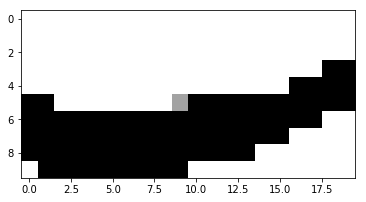

In [22]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(np.array(him), cmap='gray')
plt.show()

In [24]:
np.array(him)

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255,   0,   0],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255,   0,   0,   0,   0],
       [  0,   0, 255, 255, 255, 255, 255, 255, 255, 162,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 255, 255, 255, 255],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  